In [ ]:
#Binary (2-class) Dataset

from sklearn.datasets import make_classification

#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
X, y = make_classification(n_samples = 1000, n_features = 20, random_state = 1)

print(X.shape, y.shape)

In [ ]:
#Baseline Model: Decision Tree Classifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1) #3repeats, 10folds in cross-validation
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)

print('Mean Classification Accuracy (STD): %.2f (%.4f)' % ((scores.mean())*100, scores.std()))

#NOTE: Your results may vary a little given the stochastic nature of the algorithm or evaluation procedure, 
#    or differences in numerical precision. Consider running the example a few times and compare the average outcome.

# Sensitivity Analysis (Classification)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot


def load_dataset(n_samples):
    X, y = make_classification(n_samples = int(n_samples), n_features = 20, random_state = 1)
    return X, y

def evaluate_model(X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    return [scores.mean(), scores.std()]

# define number of samples to consider
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 900000]

means, stds = list(), list()
for n_samples in sizes:
    X, y = load_dataset(n_samples)
    mean, std = evaluate_model(X, y)
    means.append(mean)
    stds.append(std)
    #print('>%d: %.2f (%.2f)' % (n_samples, mean, std))
    
# define error bar as 2 standard deviations from the mean or 95%
err = [min(1, s*2) for s in stds]
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')
pyplot.xlabel('Dataset size')
pyplot.ylabel('Estimated Model Performance')
pyplot.grid()
pyplot.show()

# Power Analysis

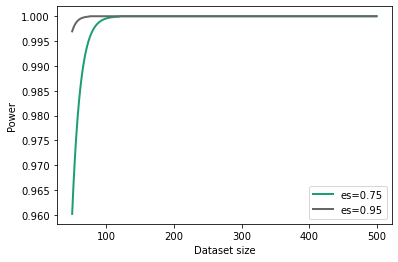

In [1]:
import statsmodels 
from statsmodels.stats.power import TTestIndPower
from numpy import array
from matplotlib import pyplot

effect_sizes = array([0.75, 0.95])
sample_sizes = array(range(50, 500))

PowerAns = TTestIndPower()
PowerAns.plot_power(dep_var = 'nobs', nobs = sample_sizes, effect_size = effect_sizes)
pyplot.xlabel('Dataset size') 
pyplot.ylabel('Power')
pyplot.title('')
pyplot.show()


In [2]:
effect_size = 0.9 #effect size (quantification of the effect of a test)
alpha = 0.05 #significance level

#Probability of rejecting null hypothesis or accepting alternative hypothesis (95%) or of detection of an effect
power = 0.95

#Observations (min) required to atleast detect an effect of 0.9  
samples = PowerAns.solve_power(effect_size, power = power, nobs1 = None, alpha = alpha)
print("Dataset size:", samples) 

Dataset size: 33.07804662693298


# Sensitivity Analysis (Regression)

In [ ]:
from sklearn.datasets import make_regression

X, y, x1 = make_regression(n_samples = 1000, n_features = 5, n_targets = 1, coef = True, random_state = 1)
print(X.shape, y.shape, x1.shape)

In [ ]:
#from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

model = XGBRegressor()
#scores = cross_validate(model, X, y, cv = 3, scoring = 'r2', return_train_score = True, n_jobs = -1)
scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2', n_jobs = -1)
#print(scores.keys())
#print(scores['train_score'].mean(), scores['train_score'].std())
#print(scores.mean(), scores.std())

print('Mean Regression Accuracy (STD): %.2f (%.4f)' % ((scores.mean())*100, scores.std()))

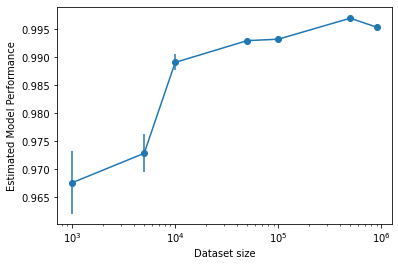

In [1]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot


def load_dataset(n_samples):
    X, y, x1 = make_regression(n_samples = int(n_samples), n_features = 5, n_targets = 1, coef = True, random_state = 1)
    return X, y

def evaluate_model(X, y):
    model = XGBRegressor()
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2', n_jobs = -1)
    return [scores.mean(), scores.std()]


sizes = [1000, 5000, 10000, 50000, 100000, 500000, 900000]

means, stds = list(), list()
for n_samples in sizes:
    X, y = load_dataset(n_samples)
    mean, std = evaluate_model(X, y)
    means.append(mean)
    stds.append(std)


err = [min(1, s*2) for s in stds]
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')
pyplot.xlabel('Dataset size')
pyplot.ylabel('Estimated Model Performance')
pyplot.grid()
pyplot.show()

In [ ]:
from sklearn.utils.multiclass import type_of_target

type_of_target(y)